In [66]:
!pip install yfinance
!pip install tensorflow

In [67]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Implementation

In [68]:
def fill_missing_values(dataset):
  resampled_dataset = dataset.ffill()
  resampled_dataset['Volume'] = dataset['Volume'].fillna(0)
  return resampled_dataset

In [69]:
gold_30m = yf.download("GC=F", period="60d", interval="30m")
gold_30m.columns = gold_30m.columns.droplevel(1)
# gold_30m = fill_missing_values(gold_30m)
gold_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/gold.csv', index=True)

silver_30m = yf.download("SI=F", period="60d", interval="30m")
silver_30m.columns = silver_30m.columns.droplevel(1)
# silver_30m = fill_missing_values(silver_30m)
silver_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/silver.csv', index=True)

cad_30m = yf.download("CADUSD=X", period="60d", interval="30m")
cad_30m.columns = cad_30m.columns.droplevel(1)
# cad_30m = fill_missing_values(cad_30m)
cad_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/cad.csv', index=True)


gold_1h = yf.download("GC=F", period='730d', interval="1h")
gold_1h.columns = gold_1h.columns.droplevel(1)
# gold_1h = fill_missing_values(gold_1h)
gold_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/gold.csv', index=True)

silver_1h = yf.download("SI=F", period="730d", interval="1h")
silver_1h.columns = silver_1h.columns.droplevel(1)
# silver_1h = fill_missing_values(silver_1h)
silver_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/silver.csv', index=True)

cad_1h = yf.download("CADUSD=X", period="730d", interval="1h")
cad_1h.columns = cad_1h.columns.droplevel(1)
# cad_1h = fill_missing_values(cad_1h)
cad_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/cad.csv', index=True)


gold_1d = yf.download("GC=F", start='2000-1-1', end='2025-12-1', interval="1d")
gold_1d.columns = gold_1d.columns.droplevel(1)
# gold_1d = fill_missing_values(gold_1d)
gold_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/gold.csv', index=True)

silver_1d = yf.download("SI=F", start='2000-1-1', end='2025-12-1', interval="1d")
silver_1d.columns = silver_1d.columns.droplevel(1)
# silver_1d = fill_missing_values(silver_1d)
silver_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/silver.csv', index=True)

cad_1d = yf.download("CADUSD=X", start='2000-1-1', end='2025-12-1', interval="1d")
cad_1d.columns = cad_1d.columns.droplevel(1)
# cad_1d = fill_missing_values(cad_1d)
cad_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/cad.csv', index=True)

/tmp/ipython-input-4241103084.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_30m = yf.download("GC=F", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4241103084.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  silver_30m = yf.download("SI=F", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4241103084.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cad_30m = yf.download("CADUSD=X", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4241103084.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_1h = yf.download("GC=F", period='730d', interval="1h")
[*********************100%***********************]  1 of 1 completed
/tmp/ipyth

In [70]:
gold_30m = gold_30m[["Close"]].rename(columns={"Close": "Gold"})
silver_30m = silver_30m[["Close"]].rename(columns={"Close": "Silver"})
cad_30m = cad_30m[["Close"]].rename(columns={"Close": "CAD"})

prices_30m = gold_30m.join([silver_30m, cad_30m], how="outer")
prices_30m = prices_30m.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_30m.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_30m.csv")

In [71]:
gold_1h = gold_1h[["Close"]].rename(columns={"Close": "Gold"})
silver_1h = silver_1h[["Close"]].rename(columns={"Close": "Silver"})
cad_1h = cad_1h[["Close"]].rename(columns={"Close": "CAD"})

prices_1h = gold_1h.join([silver_1h, cad_1h], how="outer")
prices_1h = prices_1h.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1h.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1h.csv")

In [72]:
gold_1d = gold_1d[["Close"]].rename(columns={"Close": "Gold"})
silver_1d = silver_1d[["Close"]].rename(columns={"Close": "Silver"})
cad_1d = cad_1d[["Close"]].rename(columns={"Close": "CAD"})

prices_1d = gold_1d.join([silver_1d, cad_1d], how="outer")
prices_1d = prices_1d.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1d.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1d.csv")

In [73]:
prices_30m.head()

Price,Gold,Silver,CAD
Datetime,,,
2025-09-08 23:00:00+00:00,3726.800049,43.825001,0.724864
2025-09-08 23:30:00+00:00,3726.800049,43.825001,0.724879
2025-09-09 00:00:00+00:00,3726.800049,43.825001,0.724743
2025-09-09 00:30:00+00:00,3726.800049,43.825001,0.724428
2025-09-09 01:00:00+00:00,3726.800049,43.825001,0.724071


In [74]:
prices_30m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2853 entries, 2025-09-08 23:00:00+00:00 to 2025-12-01 16:30:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    2853 non-null   float64
 1   Silver  2853 non-null   float64
 2   CAD     2853 non-null   float64
dtypes: float64(3)
memory usage: 89.2 KB


In [75]:
prices_30m.describe()

Price,Gold,Silver,CAD
count,2853.000000,2853.000000,2853.000000
mean,3999.918832,48.371712,0.715728
std,174.280182,3.130502,0.004837
min,3726.800049,43.720001,0.707269
25%,3858.399902,46.695000,0.712454
50%,4018.699951,48.235001,0.714536
75%,4129.399902,50.650002,0.718045
max,4394.299805,59.090000,0.728014


## Plots

These plots are to analyse if there is any initial noise in the data to remove it

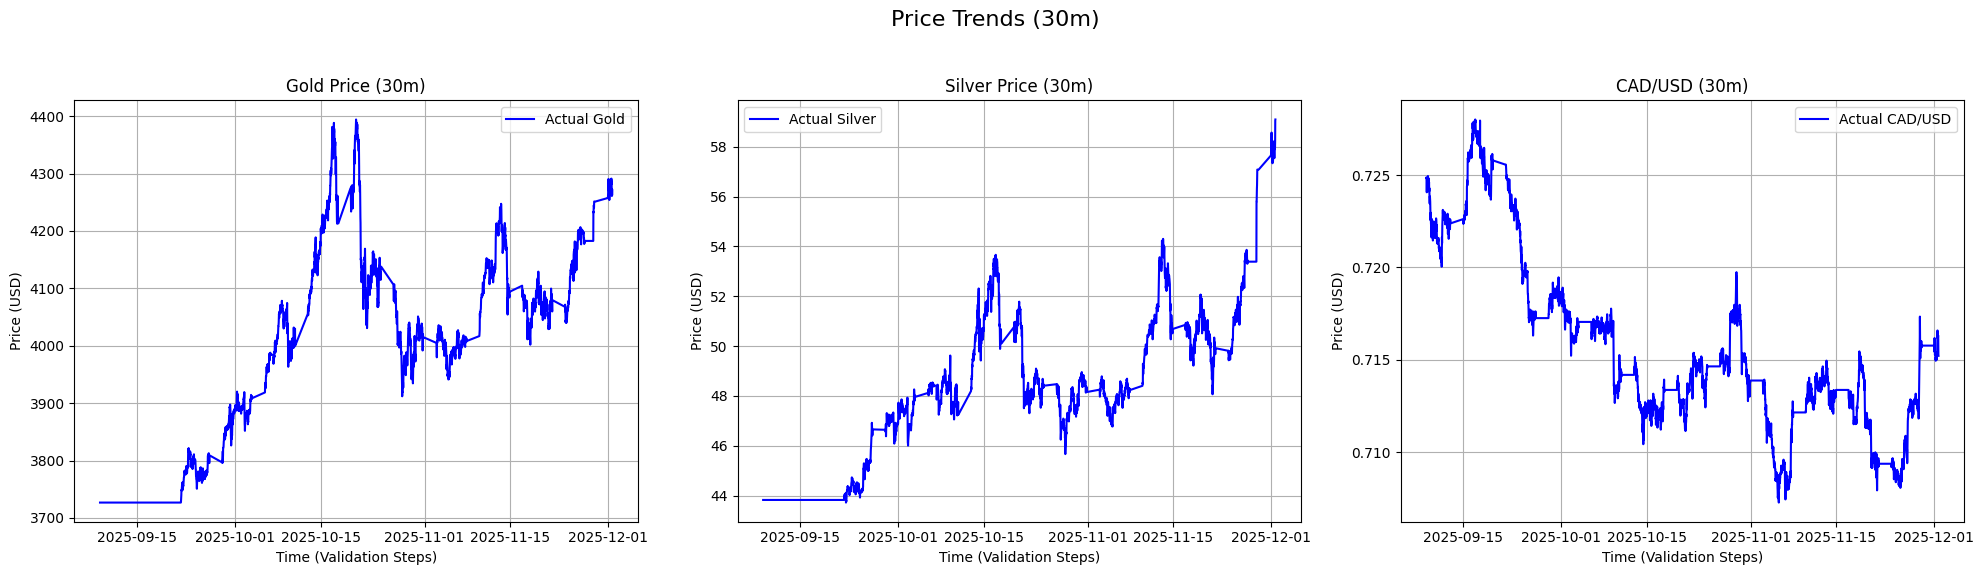

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (30m)', fontsize=16)

# gold
axes[0].plot(prices_30m['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (30m)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_30m['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (30m)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_30m['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (30m)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

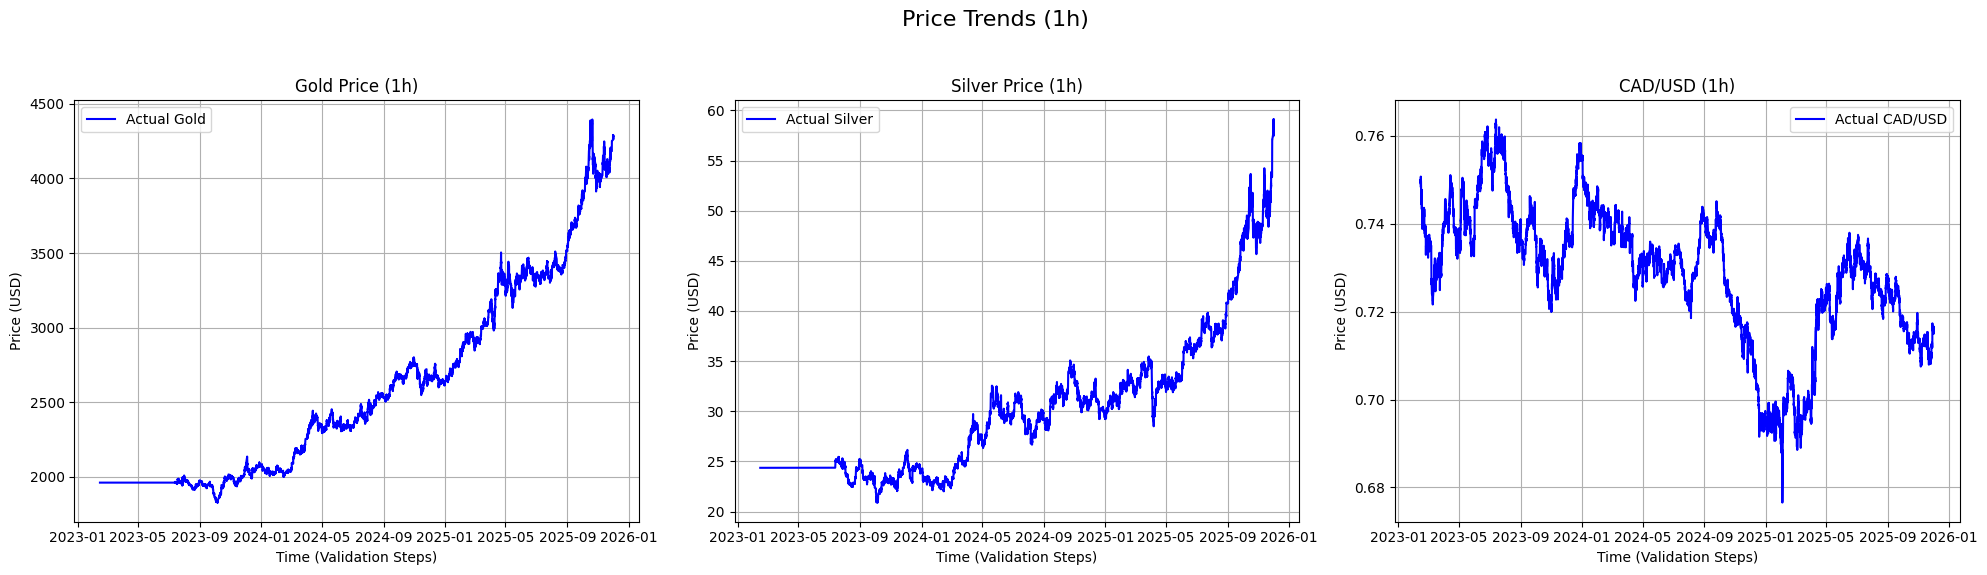

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1h)', fontsize=16)

# gold
axes[0].plot(prices_1h['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1h)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1h['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1h)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1h['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1h)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

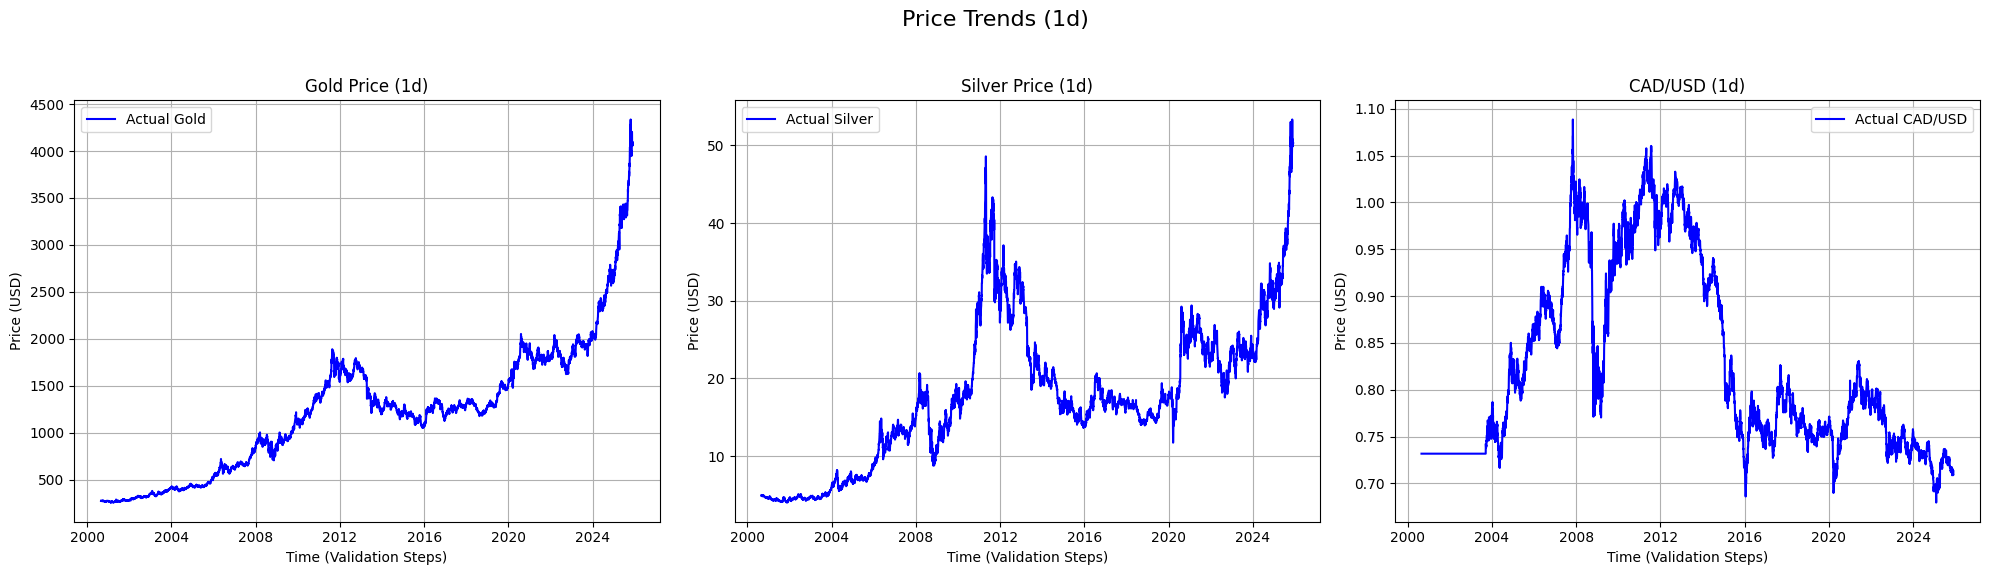

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1d)', fontsize=16)

# gold
axes[0].plot(prices_1d['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1d)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1d['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1d)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1d['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1d)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Removing Initial Noise

Some instances had initial plateaued values that are considered noise and may confuse the model, these timesteps will not be taken in the datasets for training

for 30m:
start 2025-10-3

for 1h :
start=2023-12-3

for 1d:
start=2003-09-18

In [79]:
gold_30m = yf.download("GC=F", start='2025-10-3', end='2025-12-1', interval="30m")
gold_30m.columns = gold_30m.columns.droplevel(1)
# gold_30m = fill_missing_values(gold_30m)
gold_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/gold.csv', index=True)

silver_30m = yf.download("SI=F", start='2025-10-3', end='2025-12-1', interval="30m")
silver_30m.columns = silver_30m.columns.droplevel(1)
# silver_30m = fill_missing_values(silver_30m)
silver_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/silver.csv', index=True)

cad_30m = yf.download("CADUSD=X", start='2025-10-3', end='2025-12-1', interval="30m")
cad_30m.columns = cad_30m.columns.droplevel(1)
# cad_30m = fill_missing_values(cad_30m)
cad_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/cad.csv', index=True)


gold_1h = yf.download("GC=F", start='2023-12-3', end='2025-12-1', interval="1h")
gold_1h.columns = gold_1h.columns.droplevel(1)
# gold_1h = fill_missing_values(gold_1h)
gold_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/gold.csv', index=True)

silver_1h = yf.download("SI=F", start='2023-12-3', end='2025-12-1', interval="1h")
silver_1h.columns = silver_1h.columns.droplevel(1)
# silver_1h = fill_missing_values(silver_1h)
silver_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/silver.csv', index=True)

cad_1h = yf.download("CADUSD=X", start='2023-12-3', end='2025-12-1', interval="1h")
cad_1h.columns = cad_1h.columns.droplevel(1)
# cad_1h = fill_missing_values(cad_1h)
cad_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/cad.csv', index=True)


gold_1d = yf.download("GC=F", start='2003-09-18', end='2025-12-1', interval="1d")
gold_1d.columns = gold_1d.columns.droplevel(1)
# gold_1d = fill_missing_values(gold_1d)
gold_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/gold.csv', index=True)

silver_1d = yf.download("SI=F", start='2003-09-18', end='2025-12-1', interval="1d")
silver_1d.columns = silver_1d.columns.droplevel(1)
# silver_1d = fill_missing_values(silver_1d)
silver_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/silver.csv', index=True)

cad_1d = yf.download("CADUSD=X", start='2003-09-18', end='2025-12-1', interval="1d")
cad_1d.columns = cad_1d.columns.droplevel(1)
# cad_1d = fill_missing_values(cad_1d)
cad_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/cad.csv', index=True)

/tmp/ipython-input-1245334875.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_30m = yf.download("GC=F", start='2025-10-3', end='2025-12-1', interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1245334875.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  silver_30m = yf.download("SI=F", start='2025-10-3', end='2025-12-1', interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1245334875.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cad_30m = yf.download("CADUSD=X", start='2025-10-3', end='2025-12-1', interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1245334875.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_1h = yf.download("GC=F", start='2023-12-3', end='2025-12-1', interva

In [80]:
gold_30m = gold_30m[["Close"]].rename(columns={"Close": "Gold"})
silver_30m = silver_30m[["Close"]].rename(columns={"Close": "Silver"})
cad_30m = cad_30m[["Close"]].rename(columns={"Close": "CAD"})

prices_30m = gold_30m.join([silver_30m, cad_30m], how="outer")
prices_30m = prices_30m.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_30m.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_30m.csv")

In [81]:
gold_1h = gold_1h[["Close"]].rename(columns={"Close": "Gold"})
silver_1h = silver_1h[["Close"]].rename(columns={"Close": "Silver"})
cad_1h = cad_1h[["Close"]].rename(columns={"Close": "CAD"})

prices_1h = gold_1h.join([silver_1h, cad_1h], how="outer")
prices_1h = prices_1h.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1h.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1h.csv")

In [82]:
gold_1d = gold_1d[["Close"]].rename(columns={"Close": "Gold"})
silver_1d = silver_1d[["Close"]].rename(columns={"Close": "Silver"})
cad_1d = cad_1d[["Close"]].rename(columns={"Close": "CAD"})

prices_1d = gold_1d.join([silver_1d, cad_1d], how="outer")
prices_1d = prices_1d.ffill().bfill() # forward-fill + backward-fill to deal with missing values
prices_1d.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_1d.csv")

In [83]:
prices_30m.head()

Price,Gold,Silver,CAD
Datetime,,,
2025-10-02 23:00:00+00:00,3868.0,46.805,0.716214
2025-10-02 23:30:00+00:00,3868.0,46.805,0.716286
2025-10-03 00:00:00+00:00,3868.0,46.805,0.716132
2025-10-03 00:30:00+00:00,3868.0,46.805,0.716112
2025-10-03 01:00:00+00:00,3868.0,46.805,0.716014


In [84]:
prices_30m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1977 entries, 2025-10-02 23:00:00+00:00 to 2025-12-01 04:30:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    1977 non-null   float64
 1   Silver  1977 non-null   float64
 2   CAD     1977 non-null   float64
dtypes: float64(3)
memory usage: 61.8 KB


In [85]:
prices_30m.describe()

Price,Gold,Silver,CAD
count,1977.000000,1977.000000,1977.000000
mean,4093.382450,49.802239,0.713104
std,103.968394,2.155685,0.002500
min,3867.199951,45.665001,0.707269
25%,4012.000000,48.125000,0.711744
50%,4078.199951,49.410000,0.713084
75%,4162.899902,51.130001,0.714725
max,4394.299805,58.564999,0.719746


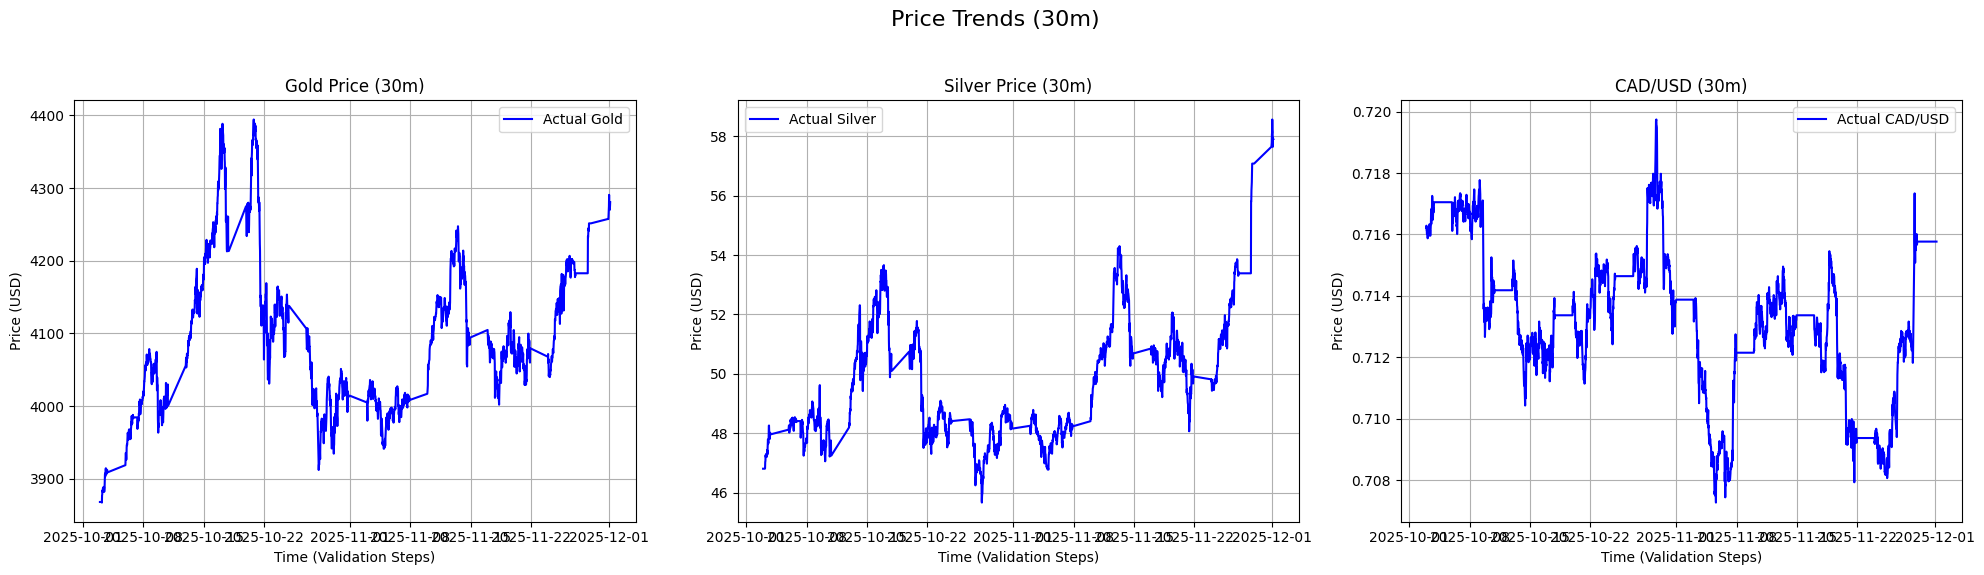

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (30m)', fontsize=16)

# gold
axes[0].plot(prices_30m['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (30m)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_30m['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (30m)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_30m['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (30m)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

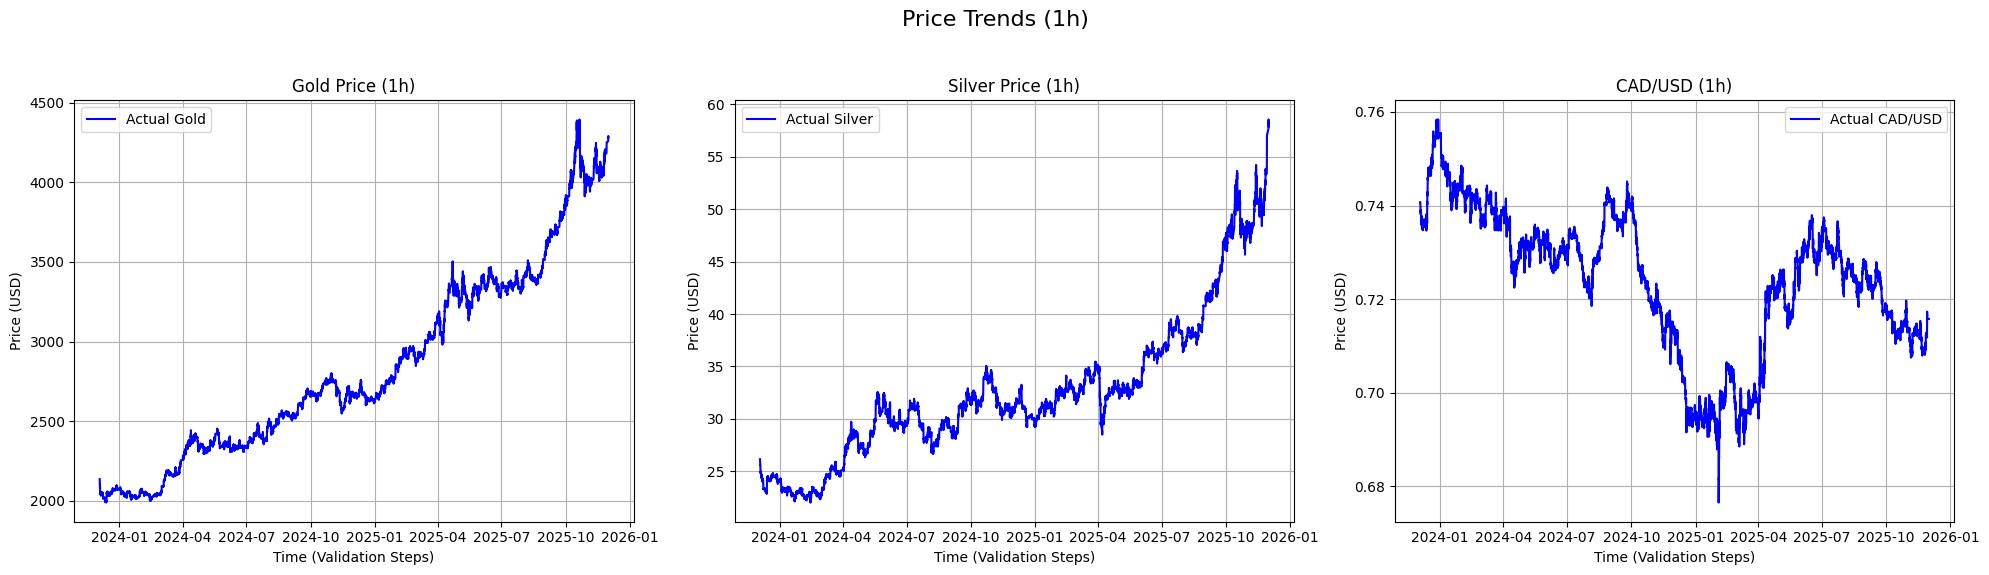

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1h)', fontsize=16)

# gold
axes[0].plot(prices_1h['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1h)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1h['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1h)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1h['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1h)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

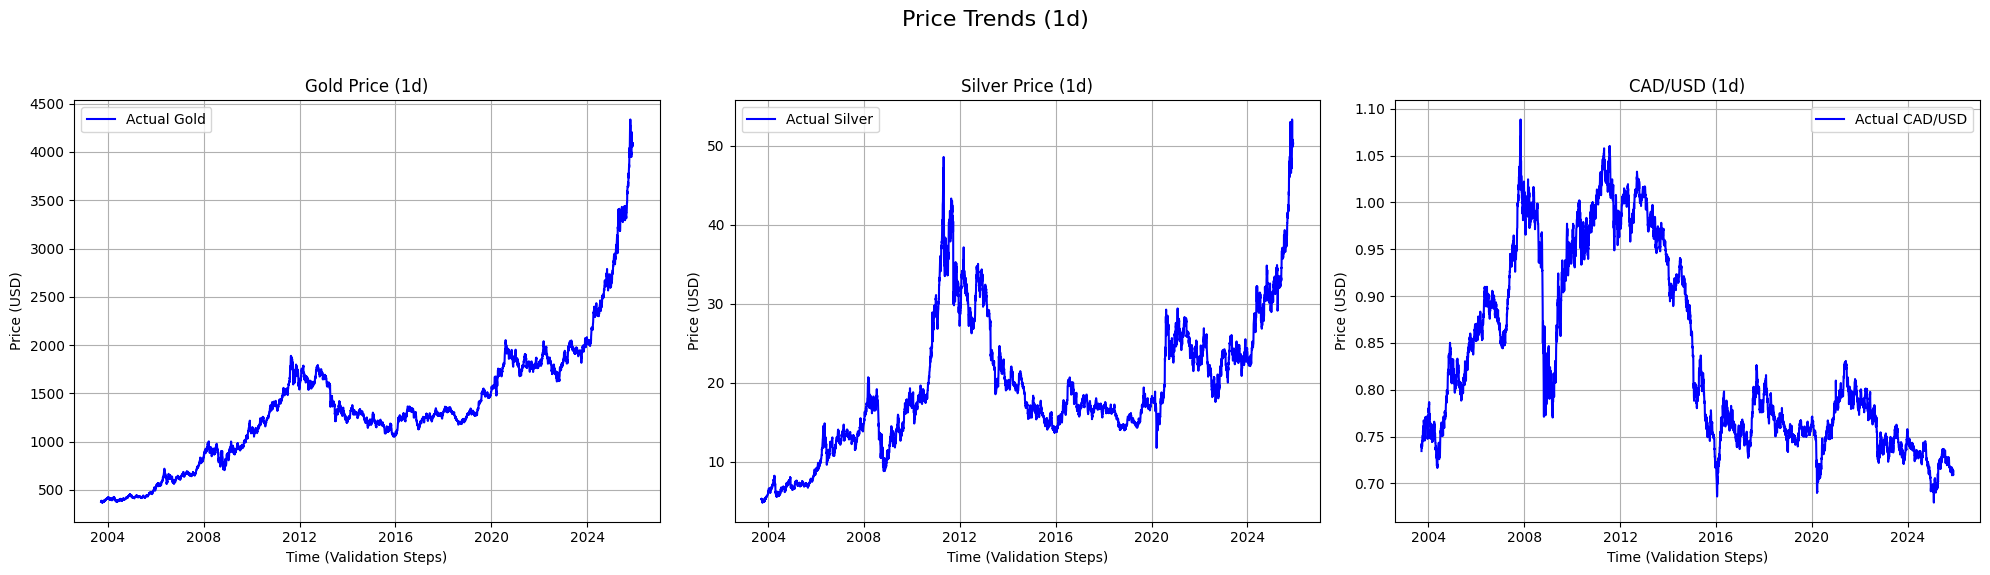

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Price Trends (1d)', fontsize=16)

# gold
axes[0].plot(prices_1d['Gold'], color="blue", label="Actual Gold")
axes[0].set_title("Gold Price (1d)")
axes[0].set_xlabel("Time (Validation Steps)")
axes[0].set_ylabel("Price (USD)")
axes[0].legend()
axes[0].grid(True)

# silver
axes[1].plot(prices_1d['Silver'], color="blue", label="Actual Silver")
axes[1].set_title("Silver Price (1d)")
axes[1].set_xlabel("Time (Validation Steps)")
axes[1].set_ylabel("Price (USD)")
axes[1].legend()
axes[1].grid(True)

# CAD
axes[2].plot(prices_1d['CAD'], color="blue", label="Actual CAD/USD")
axes[2].set_title("CAD/USD (1d)")
axes[2].set_xlabel("Time (Validation Steps)")
axes[2].set_ylabel("Price (USD)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()